In [35]:
#1
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.stats import kendalltau
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error

data = np.array([
    1.5, 1.4, 3.7, 6.5, 9.3, 15.3, 12.6, 5.7, 6.0, 8.9, 10.3, 8.4, 9.1, 6.2, 0.8, -0.3, -1.2,
    -2.8, 4.5, 5.3, 5.2, 7.2, 2.5, 5.7, 6.9, 5.0, 9.6, 6.4, 8.3, 8.7, 11.1
])
n = len(data)
t = np.arange(n)

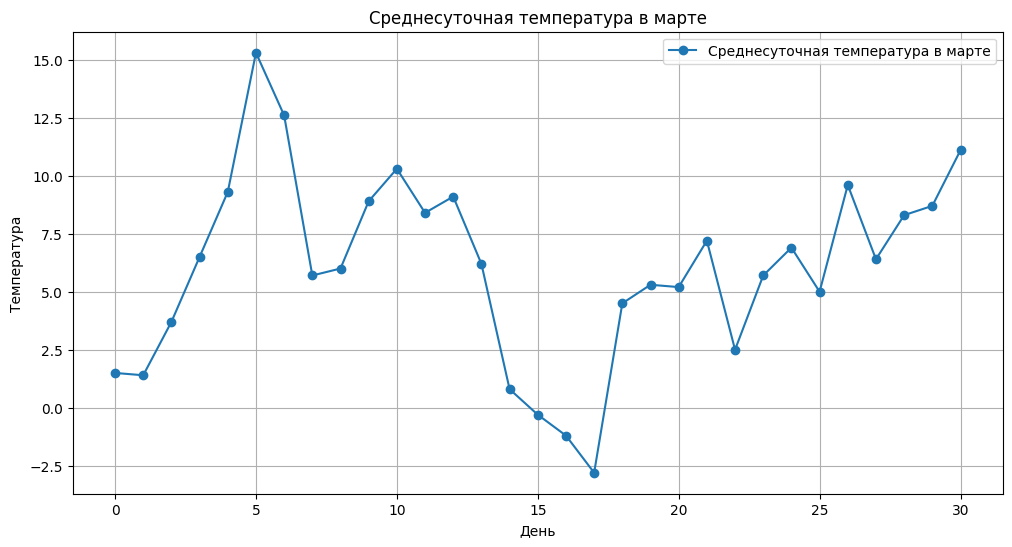

In [36]:
#2. График временного ряда
plt.figure(figsize=(12, 6))
plt.plot(t, data, marker='o', linestyle='-', label='Среднесуточная температура в марте')
plt.title('Среднесуточная температура в марте')
plt.xlabel('День')
plt.ylabel('Температура')
plt.grid(True)
plt.legend()
plt.show()


Описательные статистики:
Среднее: 6.0581
Дисперсия: 16.5625
Стандартное отклонение: 4.0697
Медиана: 6.2000
Первый квартиль (Q1): 4.1000
Третий квартиль (Q3): 8.8000
Асимметрия: -0.1466
Эксцесс: -0.1052


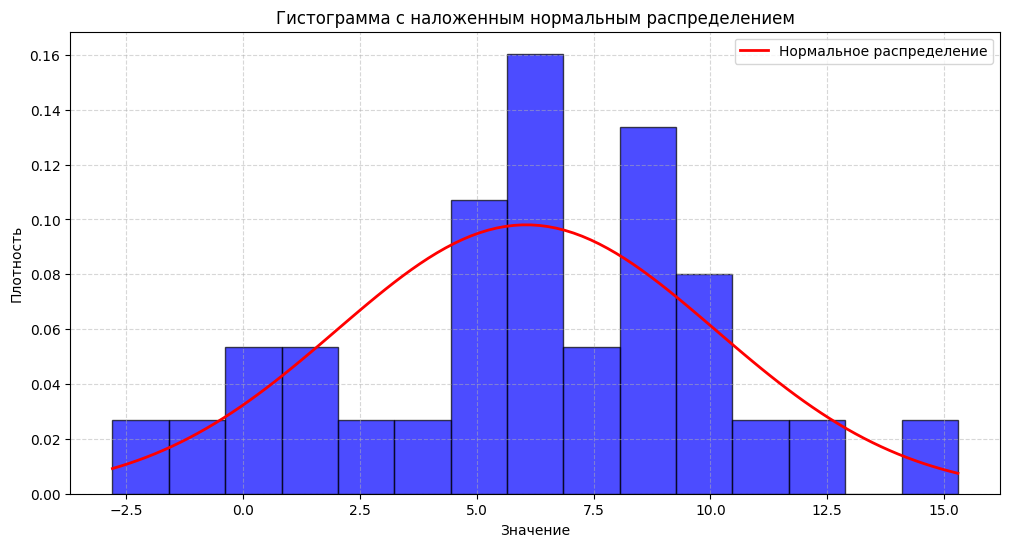

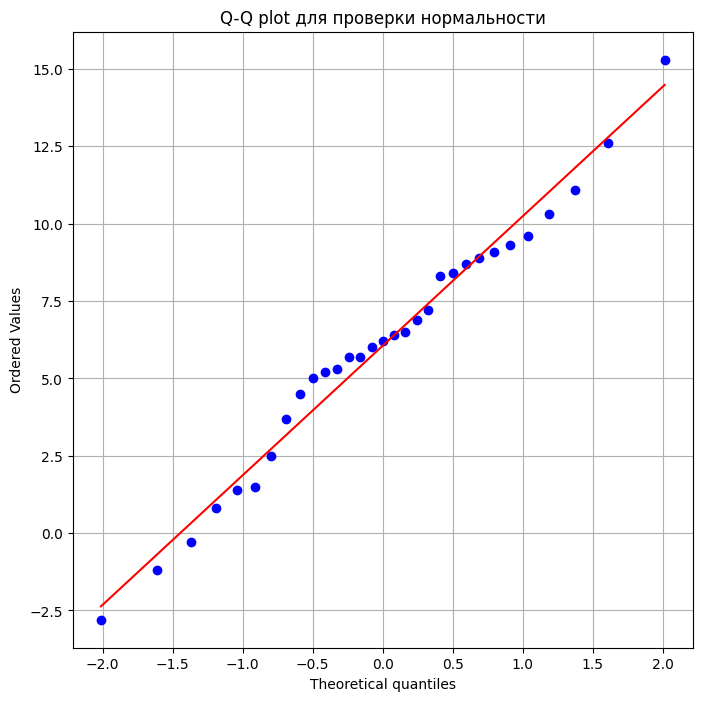


Тест Шапиро-Уилка: p-value = 0.9257
Не отвергаем гипотезу о нормальности (p > 0.05)

Тест Манна-Кендалла на тренд: p-value = 0.6101
Значимый тренд не обнаружен (p > 0.05)


In [37]:
#3.Предварительный статистический анализ
# Описательные статистики
mu_hat = np.mean(data)
var_hat = np.var(data, ddof=1)
skew_hat = stats.skew(data)
kurt_hat = stats.kurtosis(data)
median = np.median(data)
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)

print("\nОписательные статистики:")
print(f"Среднее: {mu_hat:.4f}")
print(f"Дисперсия: {var_hat:.4f}")
print(f"Стандартное отклонение: {np.sqrt(var_hat):.4f}")
print(f"Медиана: {median:.4f}")
print(f"Первый квартиль (Q1): {q1:.4f}")
print(f"Третий квартиль (Q3): {q3:.4f}")
print(f"Асимметрия: {skew_hat:.4f}")
print(f"Эксцесс: {kurt_hat:.4f}")

# Гистограмма с нормальным распределением
plt.figure(figsize=(12, 6))
plt.hist(data, bins=15, density=True, alpha=0.7, color='blue', edgecolor='black')
x_norm = np.linspace(min(data), max(data), 100)
plt.plot(x_norm, stats.norm.pdf(x_norm, mu_hat, np.sqrt(var_hat)), 
         'r-', lw=2, label='Нормальное распределение')
plt.title('Гистограмма с наложенным нормальным распределением')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Q-Q plot для проверки нормальности
plt.figure(figsize=(8, 8))
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q plot для проверки нормальности')
plt.grid(True)
plt.show()

# Проверка на нормальность (тест Шапиро-Уилка)
shapiro_test = stats.shapiro(data)
print(f"\nТест Шапиро-Уилка: p-value = {shapiro_test.pvalue:.4f}")
if shapiro_test.pvalue > 0.05:
    print("Не отвергаем гипотезу о нормальности (p > 0.05)")
else:
    print("Отвергаем гипотезу о нормальности (p ≤ 0.05)")

# Проверка на тренд (тест Манна-Кендалла)
tau, p_value = kendalltau(t, data)
print(f"\nТест Манна-Кендалла на тренд: p-value = {p_value:.4f}")
if p_value > 0.05:
    print("Значимый тренд не обнаружен (p > 0.05)")
else:
    print("Обнаружен значимый тренд (p ≤ 0.05)")

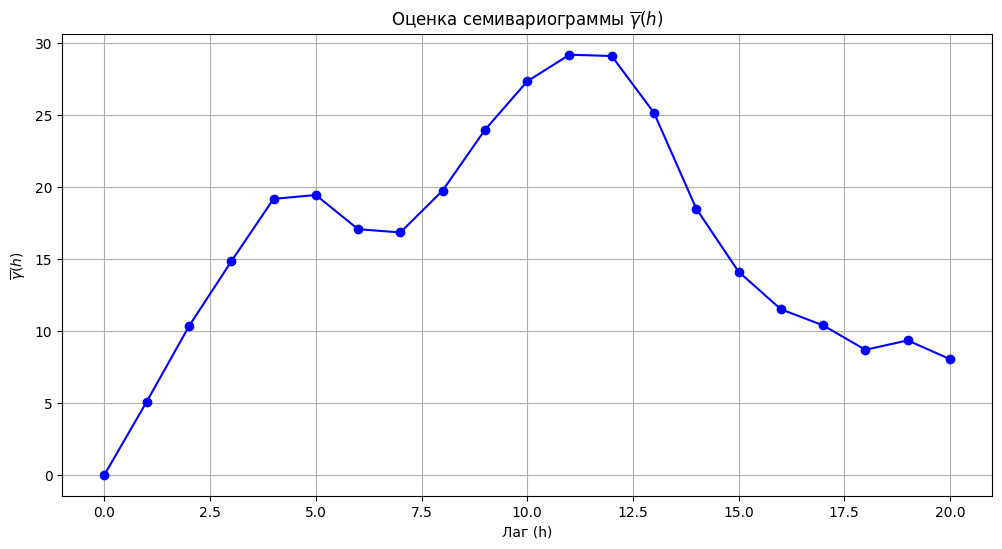

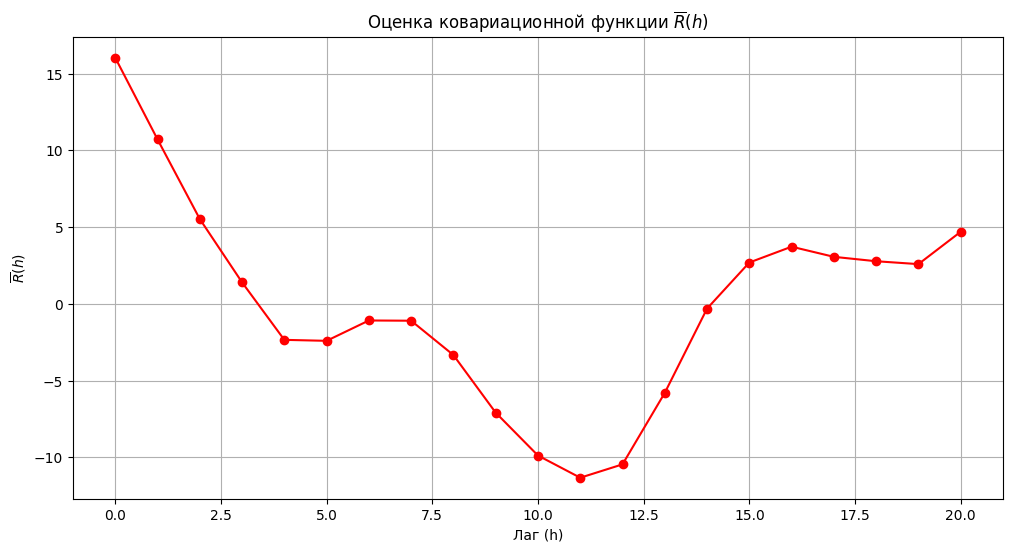

In [38]:
#4.Оценки семивариограммы и ковариационной функции
def semivariogram_estimate(data, max_lag=None):
    n = len(data)
    if max_lag is None:
        max_lag = n - 1
    gamma = np.zeros(max_lag + 1)
    for h in range(max_lag + 1):
        if h == 0:
            gamma[h] = 0
        else:
            sum_sq = 0
            for s in range(n - h):
                sum_sq += (data[s + h] - data[s])**2
            gamma[h] = sum_sq / (2 * (n - h))
    return gamma

def covariance_estimate(data, max_lag=None):
    n = len(data)
    if max_lag is None:
        max_lag = n - 1
    mu = np.mean(data)
    R = np.zeros(max_lag + 1)
    for h in range(max_lag + 1):
        if h == 0:
            R[h] = np.mean((data - mu)**2)
        else:
            sum_prod = 0
            for s in range(n - h):
                sum_prod += (data[s + h] - mu) * (data[s] - mu)
            R[h] = sum_prod / (n - h)
    return R

max_lag = int(2 * n / 3)  # Лаг до 2n/3
gamma = semivariogram_estimate(data, max_lag)
R = covariance_estimate(data, max_lag)

lags = np.arange(max_lag + 1)

plt.figure(figsize=(12, 6))
plt.plot(lags, gamma, marker='o', linestyle='-', color='b')
plt.title(r'Оценка семивариограммы $\overline{\gamma}(h)$')
plt.xlabel('Лаг (h)')
plt.ylabel(r'$\overline{\gamma}(h)$')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(lags, R, marker='o', linestyle='-', color='r')
plt.title(r'Оценка ковариационной функции $\overline{R}(h)$')
plt.xlabel('Лаг (h)')
plt.ylabel(r'$\overline{R}(h)$')
plt.grid(True)
plt.show()


Сферическая модель:
c0 (эффект самородков): 0.00
c (предельное значение): 18.08
a (диапазон): 4.69
Ошибка MSE: 40.58

Экспоненциальная модель:
c0 (эффект самородков): 0.00
c (предельное значение): 18.16
a (диапазон): 5.30
Ошибка MSE: 41.64

Гауссова модель:
c0 (эффект самородков): 1.93
c (предельное значение): 16.16
a (диапазон): 3.89
Ошибка MSE: 40.50


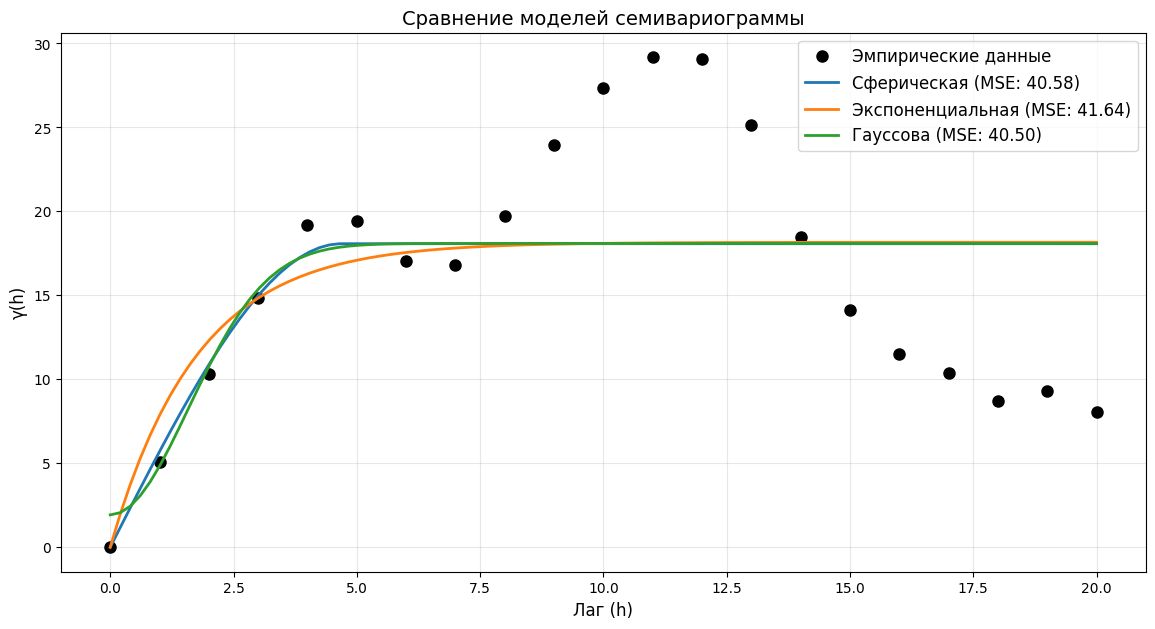

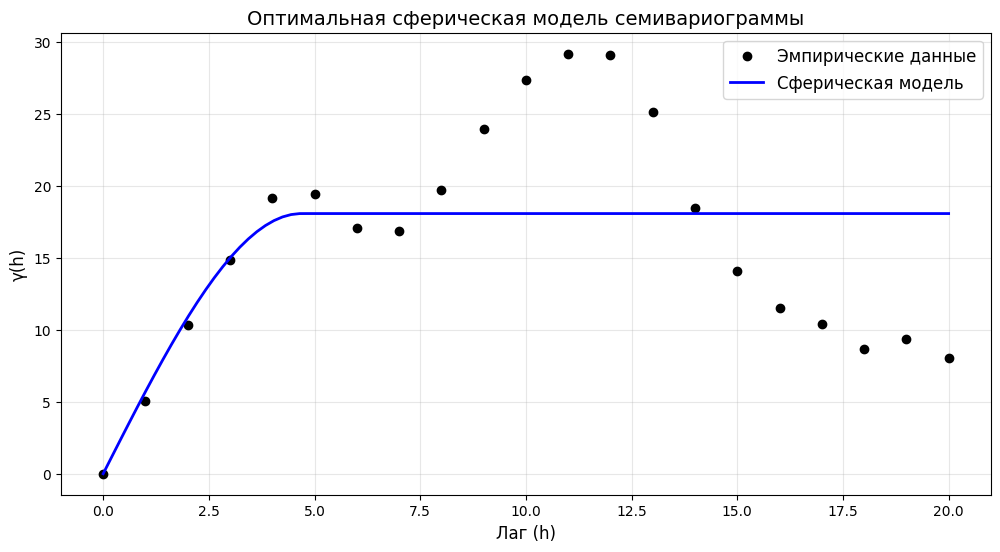

In [55]:
#5.Сравнение моделей
def spherical_model(h, c0, c, a):
    gamma = np.zeros_like(h)
    mask = (h <= a) & (h > 0)
    gamma[mask] = c0 + c*(1.5*h[mask]/a - 0.5*(h[mask]/a)**3)
    gamma[h > a] = c0 + c
    return gamma

def exponential_model(h, c0, c, a):
    return c0 + c*(1 - np.exp(-3*h/a))

def gaussian_model(h, c0, c, a):
    return c0 + c*(1 - np.exp(-3*(h/a)**2))

# Функция подгонки параметров
def fit_and_evaluate(model_func, lags, gamma_empirical):
    try:
        params, _ = curve_fit(model_func, lags[1:], gamma_empirical[1:], 
                            bounds=([0, 0, 0], [np.inf, np.inf, np.inf]))
        
        predicted = model_func(lags[1:], *params)
        mse = mean_squared_error(gamma_empirical[1:], predicted)
        
        return {
            'params': params,
            'mse': mse,
            'model_func': model_func
        }
    except:
        return None

models = {
    "Сферическая": spherical_model,
    "Экспоненциальная": exponential_model,
    "Гауссова": gaussian_model
}

results = {}
for name, model in models.items():
    results[name] = fit_and_evaluate(model, lags, gamma)

results = {k: v for k, v in results.items() if v is not None}

plt.figure(figsize=(14, 7))
plt.plot(lags, gamma, 'ko', markersize=8, label='Эмпирические данные')

for name, result in results.items():
    h_fit = np.linspace(0, max_lag, 100)
    plt.plot(h_fit, result['model_func'](h_fit, *result['params']), 
             linewidth=2, label=f'{name} (MSE: {result["mse"]:.2f})')
    
    print(f'\n{name} модель:')
    print(f'c0 (эффект самородков): {result["params"][0]:.2f}')
    print(f'c (предельное значение): {result["params"][1]:.2f}')
    print(f'a (диапазон): {result["params"][2]:.2f}')
    print(f'Ошибка MSE: {result["mse"]:.2f}')
    
plt.title(f'Сравнение моделей семивариограммы', fontsize=14)
plt.xlabel('Лаг (h)', fontsize=12)
plt.ylabel('γ(h)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

if "Сферическая" in results:
    sph_result = results["Сферическая"]
    
    plt.figure(figsize=(12, 6))
    plt.plot(lags, gamma, 'ko', markersize=6, label='Эмпирические данные')
    
    h_fit = np.linspace(0, max_lag, 100)
    plt.plot(h_fit, sph_result['model_func'](h_fit, *sph_result['params']), 
             'b-', linewidth=2, label='Сферическая модель')
    
    plt.title('Оптимальная сферическая модель семивариограммы', fontsize=14)
    plt.xlabel('Лаг (h)', fontsize=12)
    plt.ylabel('γ(h)', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.show()

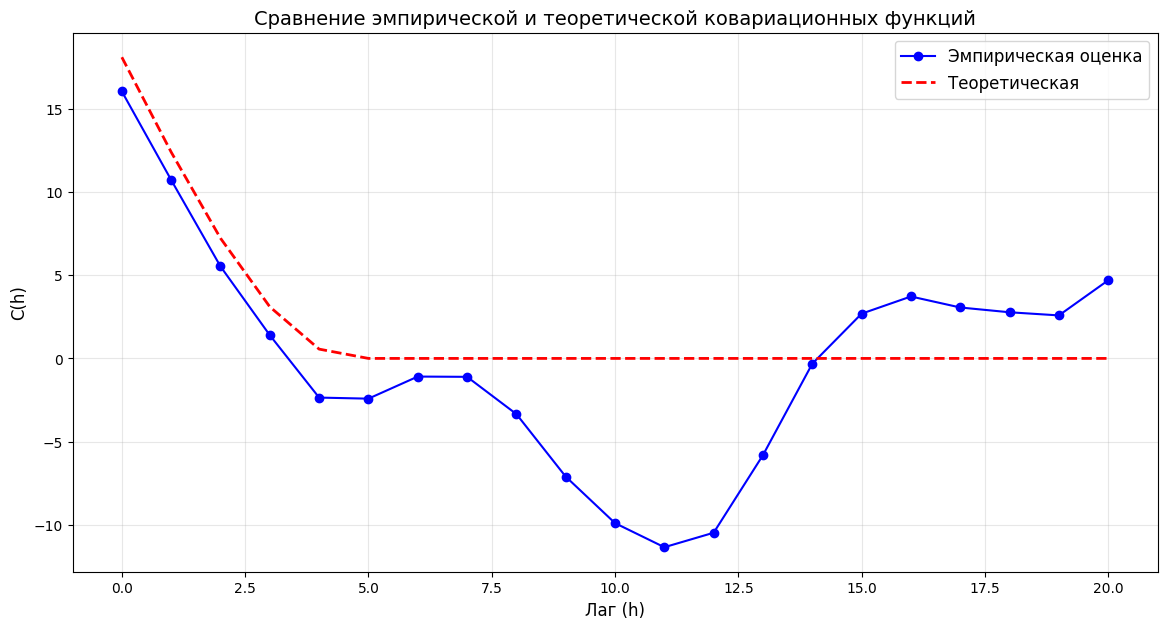


Таблица значений ковариационной функции:
Лаг (h)   Эмпирическая C(h)   Теоретическая C(h)  
0         16.0282             18.0800             
1         10.7119             12.3851             
2         5.5225              7.2160              
3         1.3946              3.0984              
4         -2.3515             0.5582              
5         -2.4155             0.0000              
6         -1.0898             0.0000              
7         -1.1056             0.0000              
8         -3.3414             0.0000              
9         -7.0954             0.0000              
10        -9.8873             0.0000              
11        -11.3337            0.0000              
12        -10.4636            0.0000              
13        -5.8038             0.0000              
14        -0.3160             0.0000              
15        2.6860              0.0000              
16        3.7173              0.0000              
17        3.0569              0.0000    

In [62]:
# 6.Аналитическая ковариационная функция на основе подобранной сферической модели
def spherical_covariance(h, c0, c, a):
    cov = np.zeros_like(h, dtype=float)
    for i, hi in enumerate(h):
        if hi == 0:
            cov[i] = c0 + c
        elif 0 < hi <= a:
            term1 = 1.5 * (hi/a)
            term2 = 0.5 * (hi/a)**3
            cov[i] = c * (1 - term1 + term2)
        else:
            cov[i] = 0
    return cov

c0 = 0
c = 18.08
a = 4.69

theoretical_cov = spherical_covariance(lags, c0, c, a)

plt.figure(figsize=(14, 7))
plt.plot(lags, R, 'bo-', markersize=6, label='Эмпирическая оценка')
plt.plot(lags, theoretical_cov, 'r--', linewidth=2, label='Теоретическая ')
plt.title('Сравнение эмпирической и теоретической ковариационных функций', fontsize=14)
plt.xlabel('Лаг (h)', fontsize=12)
plt.ylabel('C(h)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

print("\nТаблица значений ковариационной функции:")
print(f"{'Лаг (h)':<10}{'Эмпирическая C(h)':<20}{'Теоретическая C(h)':<20}")
for h in range(min(21, max_lag + 1)):
    print(f"{h:<10}{R[h]:<20.4f}{theoretical_cov[h]:<20.4f}")

In [ ]:
#итоговый код
#1
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.stats import kendalltau
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error

data = np.array([
    1.5, 1.4, 3.7, 6.5, 9.3, 15.3, 12.6, 5.7, 6.0, 8.9, 10.3, 8.4, 9.1, 6.2, 0.8, -0.3, -1.2,
    -2.8, 4.5, 5.3, 5.2, 7.2, 2.5, 5.7, 6.9, 5.0, 9.6, 6.4, 8.3, 8.7, 11.1
])
n = len(data)
t = np.arange(n)

#2. График временного ряда
plt.figure(figsize=(12, 6))
plt.plot(t, data, marker='o', linestyle='-', label='Среднесуточная температура в марте')
plt.title('Среднесуточная температура в марте')
plt.xlabel('День')
plt.ylabel('Температура')
plt.grid(True)
plt.legend()
plt.show()

#3.Предварительный статистический анализ
# Описательные статистики
mu_hat = np.mean(data)
var_hat = np.var(data, ddof=1)
skew_hat = stats.skew(data)
kurt_hat = stats.kurtosis(data)
median = np.median(data)
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)

print("\nОписательные статистики:")
print(f"Среднее: {mu_hat:.4f}")
print(f"Дисперсия: {var_hat:.4f}")
print(f"Стандартное отклонение: {np.sqrt(var_hat):.4f}")
print(f"Медиана: {median:.4f}")
print(f"Первый квартиль (Q1): {q1:.4f}")
print(f"Третий квартиль (Q3): {q3:.4f}")
print(f"Асимметрия: {skew_hat:.4f}")
print(f"Эксцесс: {kurt_hat:.4f}")

# Гистограмма с нормальным распределением
plt.figure(figsize=(12, 6))
plt.hist(data, bins=15, density=True, alpha=0.7, color='blue', edgecolor='black')
x_norm = np.linspace(min(data), max(data), 100)
plt.plot(x_norm, stats.norm.pdf(x_norm, mu_hat, np.sqrt(var_hat)), 
         'r-', lw=2, label='Нормальное распределение')
plt.title('Гистограмма с наложенным нормальным распределением')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Q-Q plot для проверки нормальности
plt.figure(figsize=(8, 8))
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q plot для проверки нормальности')
plt.grid(True)
plt.show()

# Проверка на нормальность (тест Шапиро-Уилка)
shapiro_test = stats.shapiro(data)
print(f"\nТест Шапиро-Уилка: p-value = {shapiro_test.pvalue:.4f}")
if shapiro_test.pvalue > 0.05:
    print("Не отвергаем гипотезу о нормальности (p > 0.05)")
else:
    print("Отвергаем гипотезу о нормальности (p ≤ 0.05)")

# Проверка на тренд (тест Манна-Кендалла)
tau, p_value = kendalltau(t, data)
print(f"\nТест Манна-Кендалла на тренд: p-value = {p_value:.4f}")
if p_value > 0.05:
    print("Значимый тренд не обнаружен (p > 0.05)")
else:
    print("Обнаружен значимый тренд (p ≤ 0.05)")

#4.Оценки семивариограммы и ковариационной функции
def semivariogram_estimate(data, max_lag=None):
    n = len(data)
    if max_lag is None:
        max_lag = n - 1
    gamma = np.zeros(max_lag + 1)
    for h in range(max_lag + 1):
        if h == 0:
            gamma[h] = 0
        else:
            sum_sq = 0
            for s in range(n - h):
                sum_sq += (data[s + h] - data[s])**2
            gamma[h] = sum_sq / (2 * (n - h))
    return gamma

def covariance_estimate(data, max_lag=None):
    n = len(data)
    if max_lag is None:
        max_lag = n - 1
    mu = np.mean(data)
    R = np.zeros(max_lag + 1)
    for h in range(max_lag + 1):
        if h == 0:
            R[h] = np.mean((data - mu)**2)
        else:
            sum_prod = 0
            for s in range(n - h):
                sum_prod += (data[s + h] - mu) * (data[s] - mu)
            R[h] = sum_prod / (n - h)
    return R

max_lag = int(2 * n / 3)  # Лаг до 2n/3
gamma = semivariogram_estimate(data, max_lag)
R = covariance_estimate(data, max_lag)

lags = np.arange(max_lag + 1)

plt.figure(figsize=(12, 6))
plt.plot(lags, gamma, marker='o', linestyle='-', color='b')
plt.title(r'Оценка семивариограммы $\overline{\gamma}(h)$')
plt.xlabel('Лаг (h)')
plt.ylabel(r'$\overline{\gamma}(h)$')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(lags, R, marker='o', linestyle='-', color='r')
plt.title(r'Оценка ковариационной функции $\overline{R}(h)$')
plt.xlabel('Лаг (h)')
plt.ylabel(r'$\overline{R}(h)$')
plt.grid(True)
plt.show()

# 5.Сравнение моделей
def spherical_model(h, c0, c, a):
    gamma = np.zeros_like(h)
    mask = (h <= a) & (h > 0)
    gamma[mask] = c0 + c*(1.5*h[mask]/a - 0.5*(h[mask]/a)**3)
    gamma[h > a] = c0 + c
    return gamma

def exponential_model(h, c0, c, a):
    return c0 + c*(1 - np.exp(-3*h/a))

def gaussian_model(h, c0, c, a):
    return c0 + c*(1 - np.exp(-3*(h/a)**2))

# Функция подгонки параметров
def fit_and_evaluate(model_func, lags, gamma_empirical):
    try:
        params, _ = curve_fit(model_func, lags[1:], gamma_empirical[1:], 
                            bounds=([0, 0, 0], [np.inf, np.inf, np.inf]))
        
        predicted = model_func(lags[1:], *params)
        mse = mean_squared_error(gamma_empirical[1:], predicted)
        
        return {
            'params': params,
            'mse': mse,
            'model_func': model_func
        }
    except:
        return None

models = {
    "Сферическая": spherical_model,
    "Экспоненциальная": exponential_model,
    "Гауссова": gaussian_model
}

results = {}
for name, model in models.items():
    results[name] = fit_and_evaluate(model, lags, gamma)

results = {k: v for k, v in results.items() if v is not None}

plt.figure(figsize=(14, 7))
plt.plot(lags, gamma, 'ko', markersize=8, label='Эмпирические данные')

for name, result in results.items():
    h_fit = np.linspace(0, max_lag, 100)
    plt.plot(h_fit, result['model_func'](h_fit, *result['params']), 
             linewidth=2, label=f'{name} (MSE: {result["mse"]:.2f})')
    
    print(f'\n{name} модель:')
    print(f'c0 (эффект самородков): {result["params"][0]:.2f}')
    print(f'c (предельное значение): {result["params"][1]:.2f}')
    print(f'a (диапазон): {result["params"][2]:.2f}')
    print(f'Ошибка MSE: {result["mse"]:.2f}')
    
plt.title(f'Сравнение моделей семивариограммы', fontsize=14)
plt.xlabel('Лаг (h)', fontsize=12)
plt.ylabel('γ(h)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

if "Сферическая" in results:
    sph_result = results["Сферическая"]
    
    plt.figure(figsize=(12, 6))
    plt.plot(lags, gamma, 'ko', markersize=6, label='Эмпирические данные')
    
    h_fit = np.linspace(0, max_lag, 100)
    plt.plot(h_fit, sph_result['model_func'](h_fit, *sph_result['params']), 
             'b-', linewidth=2, label='Сферическая модель')
    
    plt.title('Оптимальная сферическая модель семивариограммы', fontsize=14)
    plt.xlabel('Лаг (h)', fontsize=12)
    plt.ylabel('γ(h)', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.show()